<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo4/capitulo_4_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('https://github.com/rrajmp9/Australia-drug-sales-prediction/blob/master/AusAntidiabeticDrug.csv?raw=true')
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


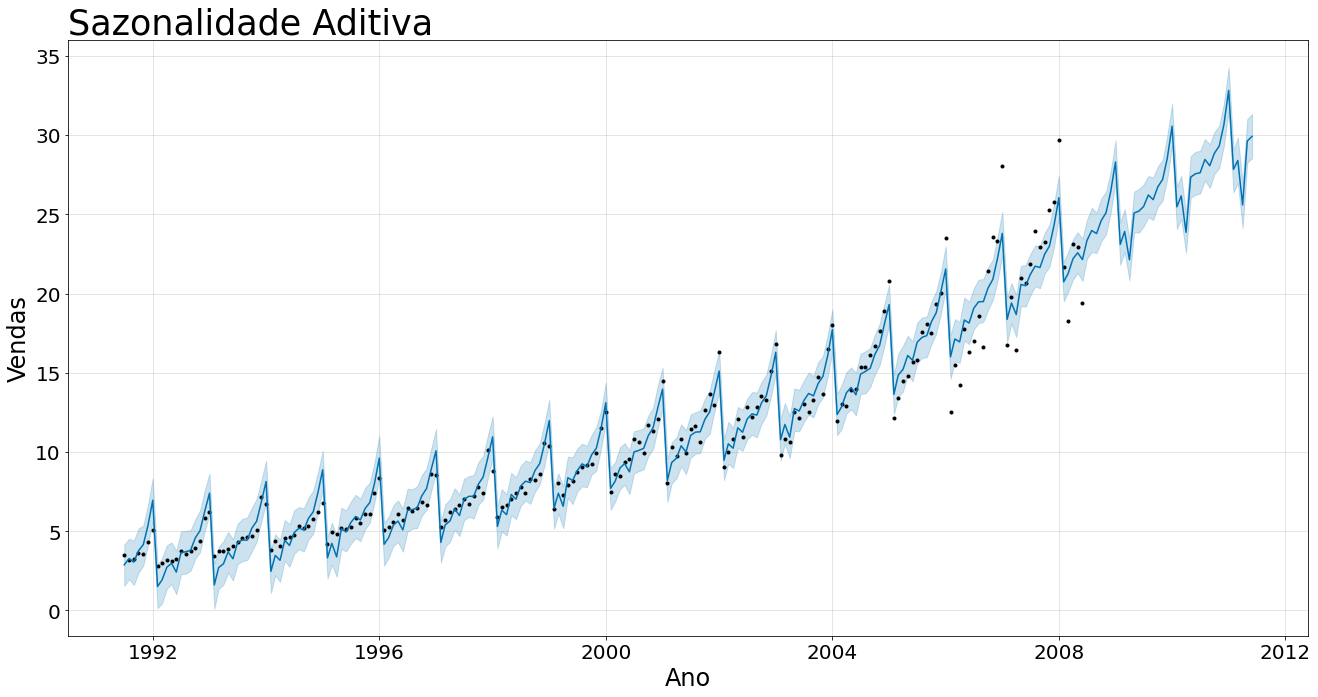

In [ ]:
#aditiva
modelo = Prophet(seasonality_mode='additive')
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=36, freq='M')
previsao = modelo.predict(dataFramefuturo)

modelo.plot(previsao, figsize=(18,9));
plt.title('Sazonalidade Aditiva ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:204])

1.05265622783494

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


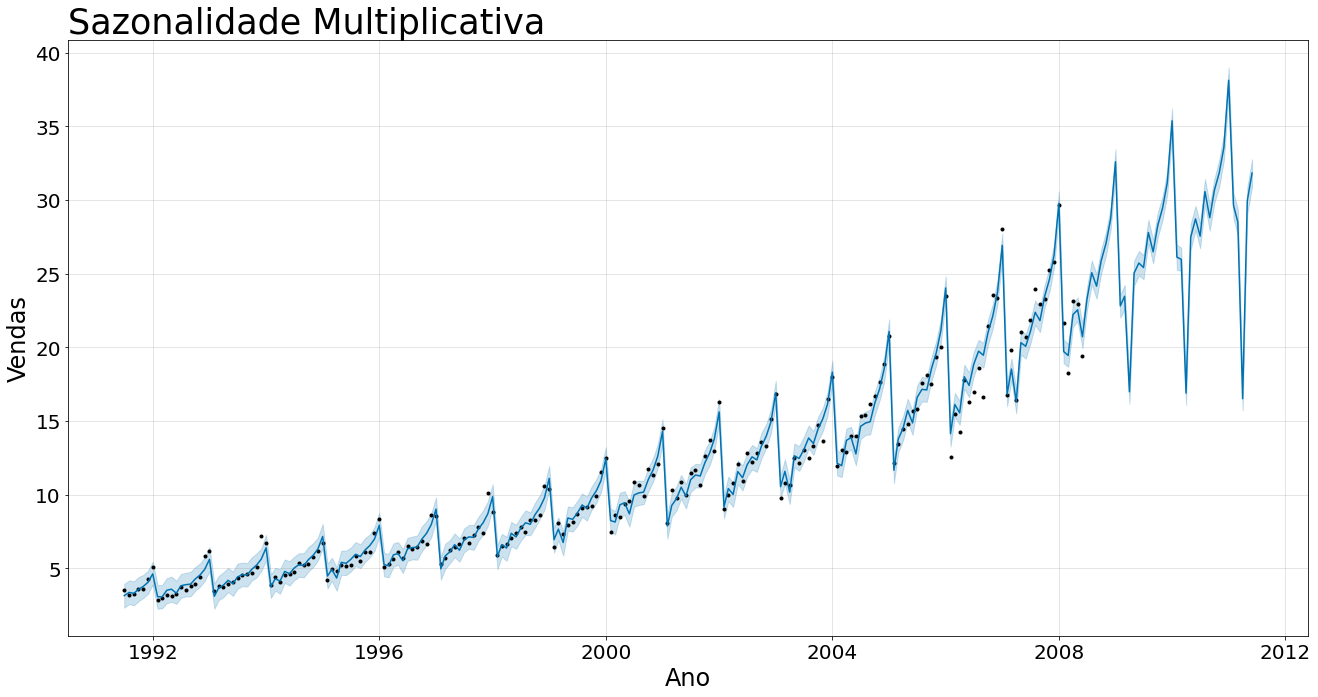

In [ ]:
#multiplicativa
modelo = Prophet(seasonality_mode='multiplicative') 
modelo.fit(df)
dataFramefutur = modelo.make_future_dataframe(periods=36, freq='M')
previsao = modelo.predict(dataFramefuturo)


modelo.plot(previsao, figsize=(18,9));
plt.title('Sazonalidade Multiplicativa ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.show()

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:204])

0.40824632080349377

seasonality_prior_scale

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


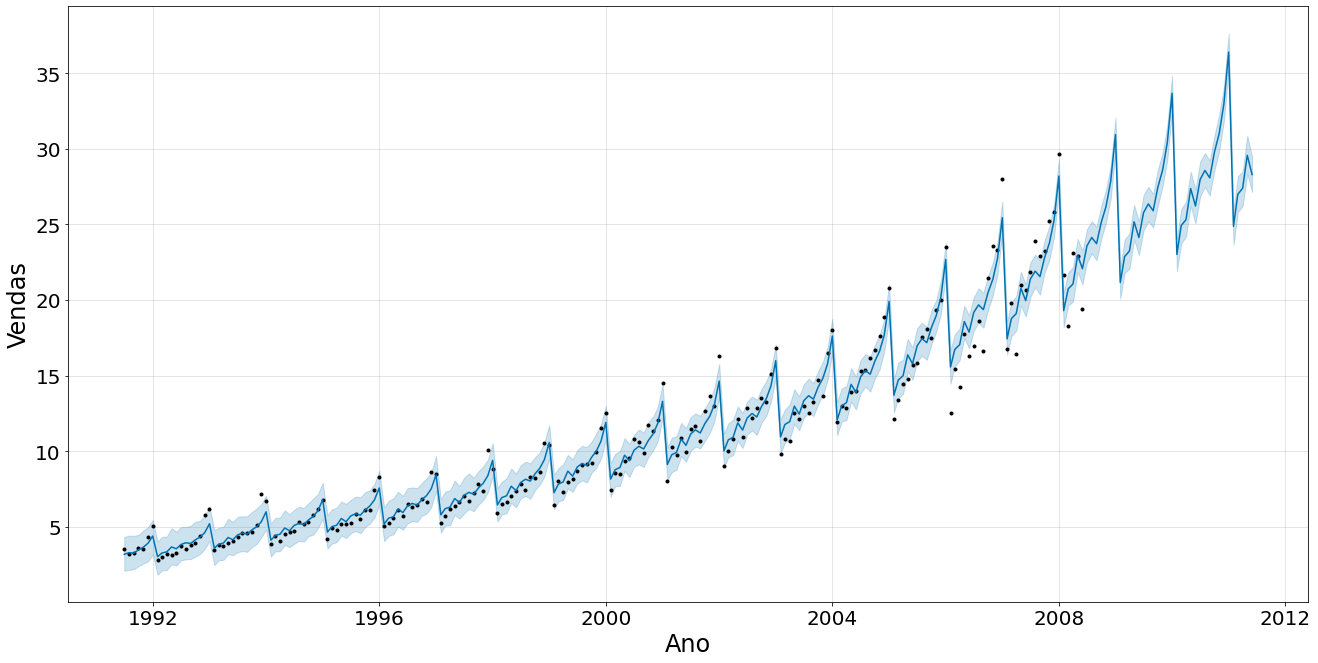

In [ ]:
#multiplicativa
modelo = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=0.01) 
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=36, freq='M')
previsao = modelo.predict(dataFramefuturo)


modelo.plot(previsao, figsize=(18,9));
plt.title('', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.show()

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:204])

0.7537985776645959

## Série de Fourier para Sazonalidades

In [ ]:
from prophet.plot import plot_yearly

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


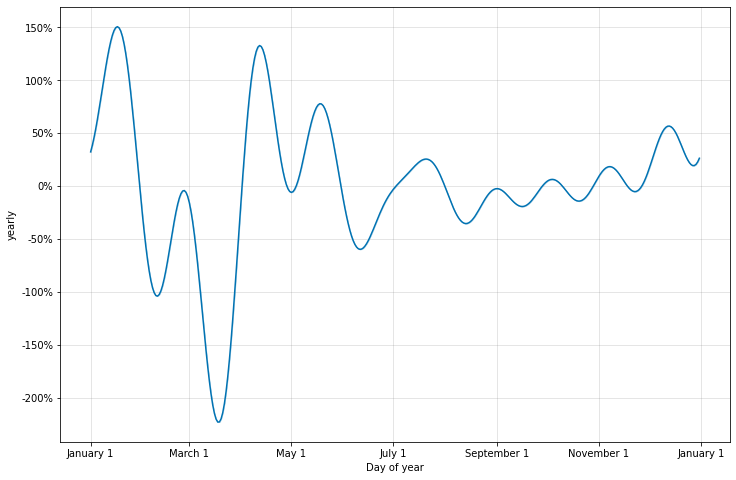

In [ ]:
modelo = Prophet(seasonality_mode='multiplicative').fit(df)
fig = plot_yearly(modelo,figsize=(12,8));

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


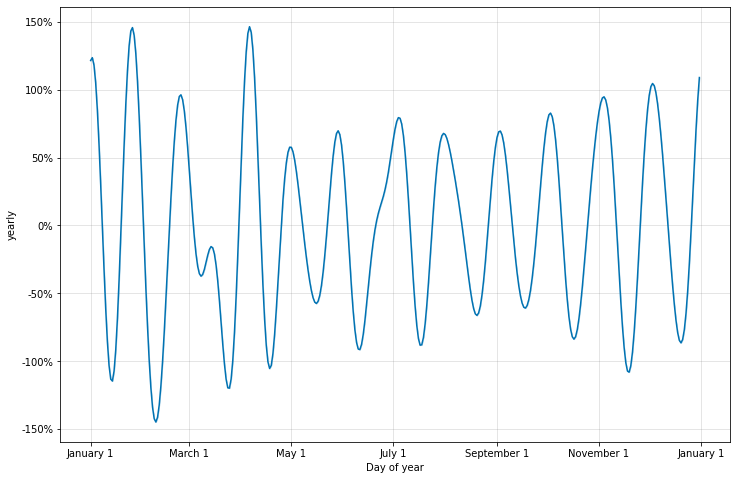

In [ ]:
modelo = Prophet(yearly_seasonality=20, seasonality_mode='multiplicative').fit(df)
fig = plot_yearly(modelo,figsize=(12,8));

## Especificando sazonalidades personalizadas

In [2]:
dados_bikes = pd.read_csv('https://github.com/allanspadini/livro-val-allan/blob/main/london_merged.csv?raw=true')
dados_bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df = pd.DataFrame()
df['ds'] = dados_bikes['timestamp'] 
df['y'] = dados_bikes['cnt']


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
modelo = Prophet()
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuturo)

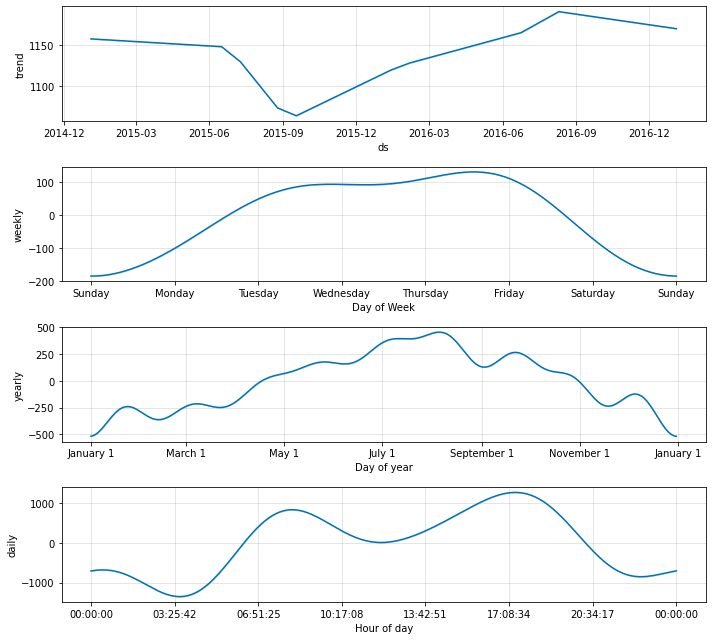

In [ ]:
modelo.plot_components(previsao, figsize=(10,9));

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

481544.8635281042

In [ ]:
modelo = Prophet(weekly_seasonality=False, daily_seasonality=False)
modelo.add_seasonality(name='monthly', period=30.5, fourier_order=5) 
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuturo)

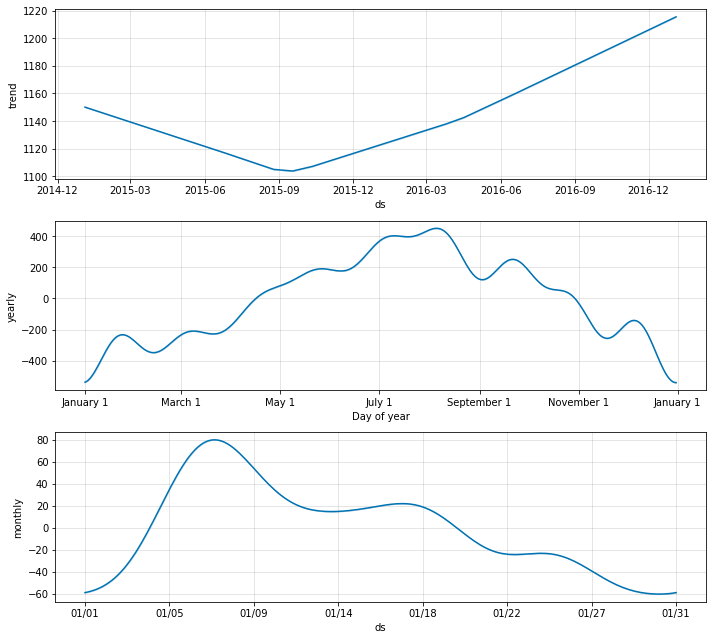

In [ ]:
modelo.plot_components(previsao, figsize=(10,9));

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat']) 

1104745.4353496681

In [ ]:
modelo = Prophet(weekly_seasonality=False)
modelo.add_seasonality(name='daily', period=1, fourier_order=3) 
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuturo)

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


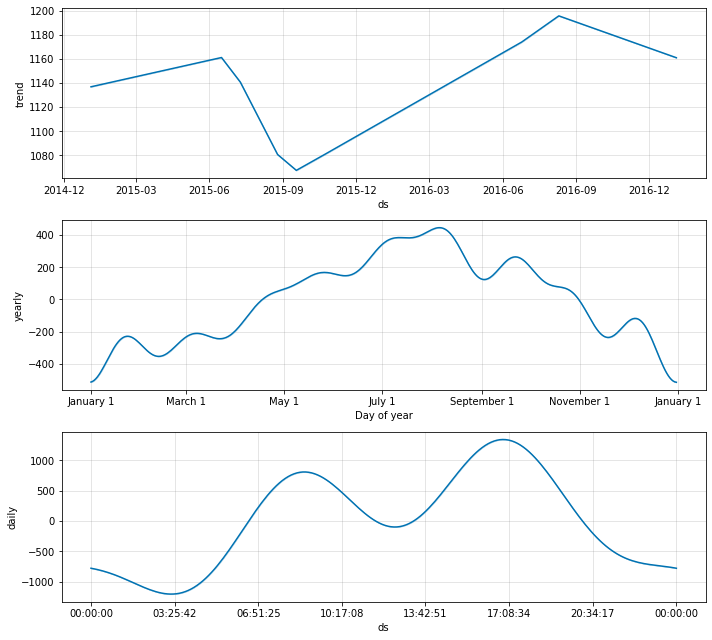

In [ ]:
modelo.plot_components(previsao, figsize=(10,9));

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

509545.316526973

In [ ]:
modelo = Prophet(weekly_seasonality=False)
modelo.add_seasonality(name='hourly', period=1/24, fourier_order=3) 
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuturo)

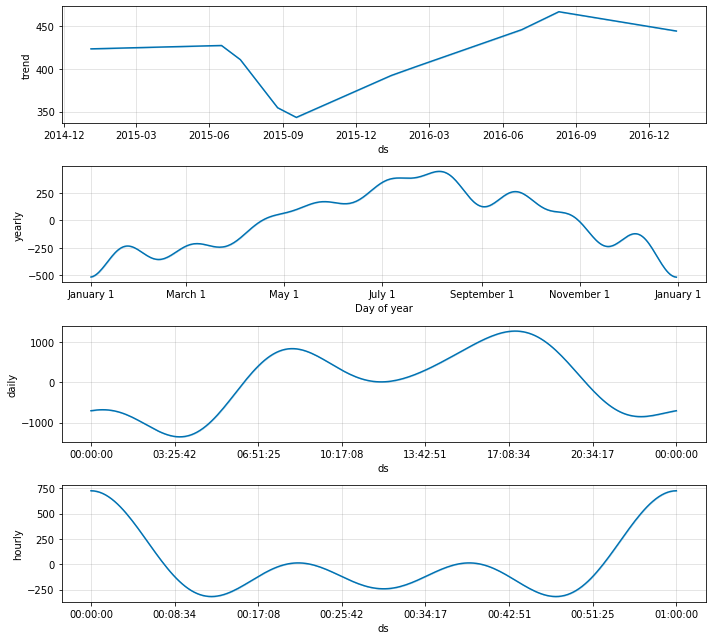

In [ ]:
modelo.plot_components(previsao, figsize=(10,9));

In [ ]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

493744.45952573005